## Data Import

In [1]:
import pandas as pd
import re
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm, tqdm_notebook, trange
tqdm.pandas()
import pickle

In [2]:
use_col_post = ['category','content_id','user_id','title','tags','post_date','last_update','content']
df_post = pd.read_csv('../src/pantip_car_post.csv',usecols=use_col_post)

use_col_cmt = ['category','content_id','user_id','comment','tags','post_date','last_update']
df_cmt = pd.read_csv('../src/pantip_car_comment.csv',usecols=use_col_cmt)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# major car manufacturer
# Honda: CRV ,BRV, CIVIC, CITY, JAZZ, ACCORD
# Toyota: CHR, ALTIS, YARIS, VIOUS, CAMRY

In [4]:
df_post.head()

,category,content_id,user_id,title,tags,post_date,last_update,content
0,auto,38339573,3300767.0,Scoopi I วิ่งอยู่ดีๆเกิดสำลัก สะดุด แล้วดับกล...,"มอเตอร์ไซค์,Honda Scoopy i,Honda (มอเตอร์ไซค์)",2018-12-06 21:33:54,0000-00-00 00:00:00,Scoopi I วิ่งอยู่ดีๆเกิดสำลัก สะดุด แล้วดับก...
1,auto,38339569,4918714.0,ทำไมรถFormula 1 เครื่องยนต์1.6ลิตร แต่แรงม้า70...,"ไซเบอร์ฟอร์มูล่า,Formula 1,รถยนต์ไฮบริด,Super ...",2018-12-06 21:32:58,0000-00-00 00:00:00,1.6L คือ 1600 CC หรือป่าวถ้าเข้าใจผิดขออภัย แต...
2,auto,38339500,885135.0,จะซื้อรถใหม่ ขอคำแนะนำครับ,"รถยนต์,ดูแลรักษารถยนต์,Toyota Yaris,Mazda 2 Sp...",2018-12-06 21:13:34,0000-00-00 00:00:00,ระหว่าง มาสด้า hi connect 620000กับ ยาริส ตั...
3,auto,38339462,4890089.0,งง กับ Filano hybrid,"Yamaha,มอเตอร์ไซค์",2018-12-06 21:05:53,0000-00-00 00:00:00,คือว่าเรากำลังจะซื้อ Filano hybrid ตัวtop ที่เ...
4,auto,38339443,531171.0,บัตรมอเตอร์ expo เป็นบัตรฟรีหรือต้องเสียตังค์ครับ,รถยนต์,2018-12-06 21:02:19,0000-00-00 00:00:00,NaN


In [5]:
df_post.shape

(417346, 8)

In [6]:
df_post['title-content'] = df_post['title'].fillna('') + ' ' + df_post['content'].fillna('')

In [7]:
# randomly check the text
rand_topic_content = df_post.loc[np.random.randint(0,df_post.shape[0]),'title-content']
print(rand_topic_content)

ถามเรื่องการใช้ทางด่วนบูรพาวิถีครับ สงสัยมาก ถึงมากที่สุดว่า speed limit บน บูรพาวิถีอยู่ที่เท่าไรครัย110 หรือ 120ใครทราบช่วยกรุณาบอกด้วยครับปล. แก้ไข  ได้คำตอบแล้วจาก คคห 1,2 ครับ  ว่า speed limit อนุโลมที่ 120ทีนี้  ไม่ทราบมีใครมีประสบการณ์โดนใบสั่งที่ความเร็ว ประมาณ 120-130 บ้างครับ ตัวผมเพิ่งโดนที่ 127  น่าจะเป็นช่วงเร่งแซงในเลนขวา  เพราะปกติจะขับไม่เกิน 120ก็เลยสงสัยว่าที่บอกอนุโลมที่ 120  มีความหมายว่าถ้าเกินจากนั้นไปเป็น 121  ก็โดนจับแล้ว  แบบนั้นรึเปล่าที่ถามเพราะจะได้ระวังมากขึ้น  ที่ผ่านมาคิดแค่ว่าน่าจะเหมือนเมืองนอก  อย่าง NZ  speed limit ที่ 100  แต่ในทางปฏิบัติ อนุโลมวิ่งได้ถึง 110  ที่ JP speed limit ที่ 100  อนุโลมวิ่งได้ถึง 110 (บางที 120)  เพราะเผื่อเร่งแซงแก้ไขข้อความเมื่อ


## Text cleaning

In [8]:
import string
import re

# put everything all together as a function
def clean_msg(msg):
    
    # remove the link---OK
    msg = re.sub(r'https*.*? ',' url ',msg)
    
    # remove the link2---OK
    msg = re.sub(r'https*.*',' url ',msg)

    # remove the link3---OK
    msg = re.sub(r'www*.*? ',' url ',msg)
    
    # remove the link4---OK
    msg = re.sub(r'www*.*',' url ',msg)
    
    # remove the email---OK
    msg = re.sub(r'[\w.-]+@[\w.]+',' email ',msg)
    
    # remove the date---OK
    msg = re.sub(r'\d+\W\d+\W\d+','date ',msg)

    # remove the date2---OK
    msg = re.sub(r'\d+\W\d+\W\d+',' date ',msg)
    
    # remove the time <--- need to check logic
    msg = re.sub(r'\d+\s*:\s*\d+',' time ',msg)
    
    # remove the time2 <--- need to check logic
    msg = re.sub(r'\d+\s*\.\s*\d+',' time ',msg)
    
    # remove the number
    msg = re.sub(r' \d+,*\d*,*\d*,*\d*,*\d*,*\d* ',' number ',msg)
    
    # remove white blank space
    msg = re.sub(r'\s+','',msg)
    
    # removing punctuation ---> move to the dataframe function
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c),'',msg)
        
    return msg

In [9]:
re.sub(r'\s+','*','you are  such   a    jerk!!!')

'you*are*such*a*jerk!!!'

In [10]:
df_post['title_content_clean'] = df_post['title-content'].progress_apply(clean_msg)

100%|██████████| 417346/417346 [01:37<00:00, 4300.95it/s]


In [11]:
df_post = df_post.dropna(subset=['post_date','content_id'])
df_post = df_post.reset_index(drop=True)

In [12]:
# df_post['content_id'].progress_apply(lambda x:re.sub(r'\d+','',x) == '')

## Text tokenizing

In [13]:
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords

thai_stop = thai_stopwords()

def tokenize(text):
    
    # tokenize
    tokens = word_tokenize(text,'newmm')
    
    # remove stopwords
    tokens = [tkn for tkn in tokens if not tkn in thai_stop]
    
    # change to lower case to normalise English word
    tokens = [tkn.lower() for tkn in tokens]
    
    return tokens

In [14]:
tokens_post = []
for i in trange(df_post.shape[0]):
    tokens_post.append(tokenize(df_post.iloc[i]['title_content_clean']))

100%|██████████| 417294/417294 [11:51<00:00, 488.99it/s]


In [15]:
# drop list with zero token
cnt_tkn = [len(l) for l in tokens_post]
cnt_tkn_serie = pd.Series(cnt_tkn)

index_drp = cnt_tkn_serie[cnt_tkn_serie==0].index.values

# drop original topic from top_df
df_post.drop(index_drp,inplace=True)

# drop from input list
for index in sorted(index_drp, reverse=True):
    del tokens_post[index]

with open('../out/tokens_post.txt', 'wb') as fp:   #Pickling
    pickle.dump(tokens_post, fp)

In [16]:
pos_txt = list(pd.read_csv('../src/positive-sentiment-words.txt',header=None)[0].values)
neg_txt = list(pd.read_csv('../src/negative-sentiment-words.txt', header=None)[0].values)

In [17]:
print('total pos word: ',len(pos_txt))
print('total neg word: ',len(neg_txt))

total pos word:  512
total neg word:  1218


In [18]:
pos_score_list = []
neg_score_list = []
for w_list in tqdm_notebook(tokens_post):
    pos_score=0
    neg_score=0
    for w in w_list:
        if w in pos_txt:pos_score+=1
        if w in neg_txt:neg_score+=1
    pos_score_list.append(pos_score)
    neg_score_list.append(neg_score)

In [19]:
df_post['pos_score'] = pos_score_list
df_post['neg_score'] = neg_score_list
df_post['sent_score'] = df_post.pos_score - df_post.neg_score

In [20]:
df_post['sent_score'].describe()

count    417279.000000
mean          0.212481
std           2.838756
min         -70.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          77.000000
Name: sent_score, dtype: float64

In [21]:
# check portion of post with sentiment
np.sum(df_post['sent_score']!=0)/len(df_post)

0.7062492960345477

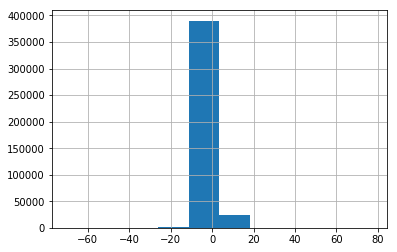

In [22]:
df_post.sent_score.hist()

In [23]:
df_post.to_csv('../out/df_post.csv',index=False)

In [24]:
df_post = pd.read_csv('../out/df_post.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df_post.loc[df_post.sent_score < -5].head(20)

,category,content_id,user_id,title,tags,post_date,last_update,content,title-content,title_content_clean,pos_score,neg_score,sent_score
90,auto,38350636,2700071.0,Audax 300 ห้วยโสมง ด่วน 304 ใจต้องนิ่ง (Windy ...,"จักรยาน,จักรยานทัวร์ริ่ง,ทริปจักรยาน,จักรยานเส...",2018-12-10 14:42:43,2018-12-10 16:06:35,มาถึงเรื่องราวสานต่อ จากการที่จะต้องผ่านสนาม 3...,Audax 300 ห้วยโสมง ด่วน 304 ใจต้องนิ่ง (Windy ...,Audaxnumberห้วยโสมงด่วนnumberใจต้องนิ่งWindySn...,36,42,-6
111,auto,38350055,4995223.0,รถเก๋งu200b Toyota Altisu200b ปี08u200b มีปัญ...,Toyota,2018-12-10 11:35:27,0000-00-00 00:00:00,คือu200bปัญหาu200bมันเริ่มจากที่ตอนแรกแฟนลืมปิ...,รถเก๋งu200b Toyota Altisu200b ปี08u200b มีปัญ...,รถเก๋งu200bToyotaAltisu200bปี08u200bมีปัญหาu20...,0,6,-6
131,auto,38349578,4995068.0,เครื่องเวฟ 110 ไอ,อู่ซ่อมรถ,2018-12-10 08:37:50,0000-00-00 00:00:00,อยากทราบคับว่า มันเป็นที่อะไรตอนผมขับรถเวฟ 110...,เครื่องเวฟ 110 ไอ อยากทราบคับว่า มันเป็นที่อะไ...,เครื่องเวฟnumberไออยากทราบคับว่ามันเป็นที่อะไร...,2,9,-7
146,auto,38349208,4994804.0,ผมโดนประกันเรียกค่าเสียหายเกินจริงควรทำยังไงดีคับ,"ร้องทุกข์,อุบัติเหตุบนท้องถนน",2018-12-10 00:50:37,0000-00-00 00:00:00,แก้ไขคือผมอยากจะถามว่าพอดีผมเกิดอุบัติเหตุแล้ว...,ผมโดนประกันเรียกค่าเสียหายเกินจริงควรทำยังไงดี...,ผมโดนประกันเรียกค่าเสียหายเกินจริงควรทำยังไงดี...,1,22,-21
214,auto,38347004,1180654.0,ใช้มอเตอร์ไซค์ในชีวิตประจำวันลำบากกันไหมคะ,มอเตอร์ไซค์,2018-12-09 12:01:23,0000-00-00 00:00:00,คือเราอยากจะเปลี่ยนมาใช้ไว้ขี่ไปทำงาน ที่ทำงาน...,ใช้มอเตอร์ไซค์ในชีวิตประจำวันลำบากกันไหมคะ คือ...,ใช้มอเตอร์ไซค์ในชีวิตประจำวันลำบากกันไหมคะคือเ...,0,6,-6
219,auto,38346803,552783.0,ถูกคนขับรถตู้สาธารณะลงมาทำร้าย,"เมาไม่ขับ,ร้องทุกข์,กฎหมายชาวบ้าน,ปัญหาสังคม",2018-12-09 10:50:00,0000-00-00 00:00:00,เหตุเกิดเมื่อคืนนะครับผมขับรถออกจากในเมืองภูเก...,ถูกคนขับรถตู้สาธารณะลงมาทำร้าย เหตุเกิดเมื่อคื...,ถูกคนขับรถตู้สาธารณะลงมาทำร้ายเหตุเกิดเมื่อคืน...,5,12,-7
228,auto,38346409,4868143.0,ฝนตกในกรุงเทพอีกแล้ว วันที่10ธค.2561ปั่นจักรยา...,"สุขภาพกาย,จักรยาน,พยากรณ์อากาศ",2018-12-09 06:27:45,0000-00-00 00:00:00,ทำไมต้องตกในวันหยุดเราเอาพัดลมเป่าลมร้อนจากภาค...,ฝนตกในกรุงเทพอีกแล้ว วันที่10ธค.2561ปั่นจักรยา...,ฝนตกในกรุงเทพอีกแล้ววันที่10ธค2561ปั่นจักรยานท...,0,6,-6
253,auto,38345583,4033756.0,ตำรวจจราจรเค้าไม่ทำงานกันหรอคะ,"อุบัติเหตุบนท้องถนน,การจราจร,ปัญหาสังคม,กฎหมาย...",2018-12-08 21:07:56,0000-00-00 00:00:00,เราไม่ได้มีเจตนาจะทำร้ายใครนะคะ เราแค่สงสัยเฉย...,ตำรวจจราจรเค้าไม่ทำงานกันหรอคะ เราไม่ได้มีเจตน...,ตำรวจจราจรเค้าไม่ทำงานกันหรอคะเราไม่ได้มีเจตนา...,0,6,-6
264,auto,38345293,4992345.0,จะซื้อ/เทิร์นรถคันแรกก็โดนพนักงานโตโยต้าชัวร์เ...,"โชว์รูมรถยนต์,รถยนต์,Toyota",2018-12-08 19:32:50,2018-12-08 19:47:27,เมื่อสองสามวันก่อนเราไปดูรถที่งานมอเตอร์เอ็กซ์...,จะซื้อ/เทิร์นรถคันแรกก็โดนพนักงานโตโยต้าชัวร์เ...,จะซื้อเทิร์นรถคันแรกก็โดนพนักงานโตโยต้าชัวร์เล...,10,24,-14
286,auto,38344693,3912631.0,"ถามหน่อยครับ สมมติรถราคา 80,000 ผ่อนไปได้ 60,0...","กฎหมายชาวบ้าน,ทนายความ,หนี้สิน (Liability),รถยนต์",2018-12-08 16:00:16,0000-00-00 00:00:00,รู้แต่ว่าถ้ารถโดนยึดแล้วค้างผ่อนไปเท่าไหร่แล้ว...,"ถามหน่อยครับ สมมติรถราคา 80,000 ผ่อนไปได้ 60,0...",ถามหน่อยครับสมมติรถราคาnumberผ่อนไปได้numberแล...,0,6,-6
